In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import glob
import warnings

warnings.filterwarnings('ignore')

sns.set(rc={"figure.dpi":1200})
sns.set_context('notebook')
sns.set_style("ticks")

mpl.style.use('default')

# Update rcParams for global consistency
mpl.rcParams.update({
    'axes.linewidth': 7,           # Line width for axes
    'xtick.major.size': 20,        # Major tick size
    'xtick.major.width': 7,        # Major tick width
    'xtick.minor.size': 10,        # Minor tick size
    'xtick.minor.width': 7,        # Minor tick width
    'ytick.major.size': 20,        # Major tick size
    'ytick.major.width': 7,        # Major tick width
    'ytick.minor.size': 10,        # Minor tick size
    'ytick.minor.width': 7,        # Minor tick width
    'ytick.labelsize': 48,         # Label size for y ticks
    'xtick.labelsize': 48,         # Label size for x ticks
    'font.size': 60,               # Font size for text
    'font.sans-serif': 'Arial',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial',
    'mathtext.bf': 'Arial:bold',
    'lines.linewidth': 7,          # Line width for all lines
    'scatter.marker': 'o',         # Default marker for scatter
    'lines.markersize': 10,        # Marker size for scatter in points
    'axes.titlesize': 'large',     # Title size
    'axes.labelsize': 'large',     # Label size for axes
    'legend.fontsize': 'large'     # Font size for legends
})


In [3]:
df = pd.read_csv('../sequences.csv')


In [4]:
df

,ID,Gene,ADseq,Activity_Mean_MSS18,Activity_std_MSS18,MutName,Protein,ADSeq+FRET Pair sequence
0,1,Hif1-AD2_46,RLLGWSMDESGLPWLTSYDCEVWAPIWGSRWLLWGEELLRALDWVW,2103.122677,576.329705,NQ>W,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
1,2,Hif1-AD2_46,RLLGQSWDESGLPQLTSYDCEVNWPIQGSRNLLQGEELLRWLDQVN,2111.794463,189.483389,MA>W,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
2,3,Hif1-AD2_46,RLLGQSMDESGLPQLTSYDCEVNAPIQGSRNLLQGEELLRALDQVN,2695.866145,258.490579,WT,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
3,4,Hif1-AD2_46,ELLGQSMDESGLPQLTSYDCEVNAPIQGSEFLLQGEELLDALDQVN,4746.673271,996.520233,RK>E,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
4,5,Hif1-AD2_46,DLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN,4858.260837,808.684618,RK>D,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
5,7,CITED2,TDAIDEEVAMSAVIEMGLDRIKELPELWLGQNEFDFMTD,1989.684485,510.069751,FL>A_NT,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
6,8,CITED2,TDFIDEEVFMSFVIEMGFDRIKEFPEFWFGQNEFDFMTD,2081.676282,263.574796,L>F,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
7,9,CITED2,TDFIDEEVWMSWVIEMGWDRIKEWPEWWWGQNEFDFMTD,2317.262431,300.576006,L>W,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
8,10,CITED2,TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTD,4633.448213,835.652083,WT,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...
9,11,CITED2,TDFIDEEVLMSLVIEMGLDEIEELPELWLGQNEFDFMTD,5096.616988,896.112121,RK>E,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...


In [5]:
# Print the list of values in the 'MutName' column
mut_name_values = df['MutName'].tolist()
print(mut_name_values)


['NQ>W', 'MA>W', 'WT', 'RK>E', 'RK>D', 'FL>A_NT', 'L>F', 'L>W', 'WT', 'RK>E', 'RK>A_CT', 'GS39', 'GS46']


In [6]:
from pyagadir import predict_alphahelix

# Create new DataFrame columns to store the results
df['Percent Helix'] = None  # Initialize the column for percent helicity
df['Per-residue Helical Propensity'] = None  # Initialize the column for per-residue helicity

# Iterate over the sequences in the ADseq column
for index, sequence in df['ADseq'].items():
    if isinstance(sequence, str) and len(sequence) > 0:  # Ensure valid sequences
        result = predict_alphahelix(sequence)
        df.at[index, 'Percent Helix'] = result.percent_helix
        df.at[index, 'Per-residue Helical Propensity'] = result.helical_propensity

# Output the updated DataFrame
df['Percent Helix'] = df['Percent Helix'] * 100
df


,ID,Gene,ADseq,Activity_Mean_MSS18,Activity_std_MSS18,MutName,Protein,ADSeq+FRET Pair sequence,Percent Helix,Per-residue Helical Propensity
0,1,Hif1-AD2_46,RLLGWSMDESGLPWLTSYDCEVWAPIWGSRWLLWGEELLRALDWVW,2103.122677,576.329705,NQ>W,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,1.9,"[0.0004383607305862941, 0.0005354638008038949,..."
1,2,Hif1-AD2_46,RLLGQSWDESGLPQLTSYDCEVNWPIQGSRNLLQGEELLRWLDQVN,2111.794463,189.483389,MA>W,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,1.3,"[0.00021385212806473785, 0.0002541134789981932..."
2,3,Hif1-AD2_46,RLLGQSMDESGLPQLTSYDCEVNAPIQGSRNLLQGEELLRALDQVN,2695.866145,258.490579,WT,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,1.5,"[0.0002855420720496063, 0.00036171907953764094..."
3,4,Hif1-AD2_46,ELLGQSMDESGLPQLTSYDCEVNAPIQGSEFLLQGEELLDALDQVN,4746.673271,996.520233,RK>E,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,0.4,"[0.00031883520708510775, 0.0004007208763990835..."
4,5,Hif1-AD2_46,DLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN,4858.260837,808.684618,RK>D,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,0.3,"[0.00019205027355081246, 0.0002743496456426648..."
5,7,CITED2,TDAIDEEVAMSAVIEMGLDRIKELPELWLGQNEFDFMTD,1989.684485,510.069751,FL>A_NT,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,2.9,"[0.005672039402357132, 0.025506870089270443, 0..."
6,8,CITED2,TDFIDEEVFMSFVIEMGFDRIKEFPEFWFGQNEFDFMTD,2081.676282,263.574796,L>F,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,2.7,"[0.003912921622641955, 0.017533513444956565, 0..."
7,9,CITED2,TDFIDEEVWMSWVIEMGWDRIKEWPEWWWGQNEFDFMTD,2317.262431,300.576006,L>W,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,2.8,"[0.003890458918019823, 0.01743289540100842, 0...."
8,10,CITED2,TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTD,4633.448213,835.652083,WT,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,5.5,"[0.009685740987478104, 0.043829257593662796, 0..."
9,11,CITED2,TDFIDEEVLMSLVIEMGLDEIEELPELWLGQNEFDFMTD,5096.616988,896.112121,RK>E,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,4.5,"[0.008762824692922663, 0.03962285941221854, 0...."


In [34]:
# Define the color mappings for each protein
hif1a_color_mapping = {
    'NQ>W': 'violet',
    'MA>W': 'violet',
    'WT': 'mediumorchid',
    'RK>E': 'indigo',
    'RK>D': 'indigo'
}

cited2_color_mapping = {
    'FL>A': 'LimeGreen',
    'L>F': 'LimeGreen',
    'L>W': 'LimeGreen',
    'WT': 'green',
    'RK>E': 'LimeGreen',
    'RK>Amut20to39': 'LimeGreen'
}

# Function to map colors based on protein and mutant
def assign_color(row):
    if row['Protein'] == 'HIF1A':
        return hif1a_color_mapping.get(row['MutName'], None)
    elif row['Protein'] == 'CITED2':
        return cited2_color_mapping.get(row['MutName'], None)
    else:
        return None

# Apply the function to create the 'color' column
df['color'] = df.apply(assign_color, axis=1)
label_replacements = {
    'FL>A_NT': 'FL$>A_{NT}$',
    'RK>A_CT': 'RK$>A_{CT}$'
}
# Replace values in the 'MutName' column based on the label_replacements dictionary
df['MutName'] = df['MutName'].replace(label_replacements)
df

,ID,Gene,ADseq,Activity_Mean_MSS18,Activity_std_MSS18,MutName,Protein,ADSeq+FRET Pair sequence,Percent Helix,Per-residue Helical Propensity,color
0,1,Hif1-AD2_46,RLLGWSMDESGLPWLTSYDCEVWAPIWGSRWLLWGEELLRALDWVW,2103.122677,576.329705,NQ>W,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,1.9,"[0.0004383607305862941, 0.0005354638008038949,...",violet
1,2,Hif1-AD2_46,RLLGQSWDESGLPQLTSYDCEVNWPIQGSRNLLQGEELLRWLDQVN,2111.794463,189.483389,MA>W,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,1.3,"[0.00021385212806473785, 0.0002541134789981932...",violet
2,3,Hif1-AD2_46,RLLGQSMDESGLPQLTSYDCEVNAPIQGSRNLLQGEELLRALDQVN,2695.866145,258.490579,WT,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,1.5,"[0.0002855420720496063, 0.00036171907953764094...",mediumorchid
3,4,Hif1-AD2_46,ELLGQSMDESGLPQLTSYDCEVNAPIQGSEFLLQGEELLDALDQVN,4746.673271,996.520233,RK>E,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,0.4,"[0.00031883520708510775, 0.0004007208763990835...",indigo
4,5,Hif1-AD2_46,DLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN,4858.260837,808.684618,RK>D,HIF1A,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,0.3,"[0.00019205027355081246, 0.0002743496456426648...",indigo
5,7,CITED2,TDAIDEEVAMSAVIEMGLDRIKELPELWLGQNEFDFMTD,1989.684485,510.069751,FL$>A_{NT}$,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,2.9,"[0.005672039402357132, 0.025506870089270443, 0...",None
6,8,CITED2,TDFIDEEVFMSFVIEMGFDRIKEFPEFWFGQNEFDFMTD,2081.676282,263.574796,L>F,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,2.7,"[0.003912921622641955, 0.017533513444956565, 0...",LimeGreen
7,9,CITED2,TDFIDEEVWMSWVIEMGWDRIKEWPEWWWGQNEFDFMTD,2317.262431,300.576006,L>W,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,2.8,"[0.003890458918019823, 0.01743289540100842, 0....",LimeGreen
8,10,CITED2,TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTD,4633.448213,835.652083,WT,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,5.5,"[0.009685740987478104, 0.043829257593662796, 0...",green
9,11,CITED2,TDFIDEEVLMSLVIEMGLDEIEELPELWLGQNEFDFMTD,5096.616988,896.112121,RK>E,CITED2,MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLK...,4.5,"[0.008762824692922663, 0.03962285941221854, 0....",LimeGreen


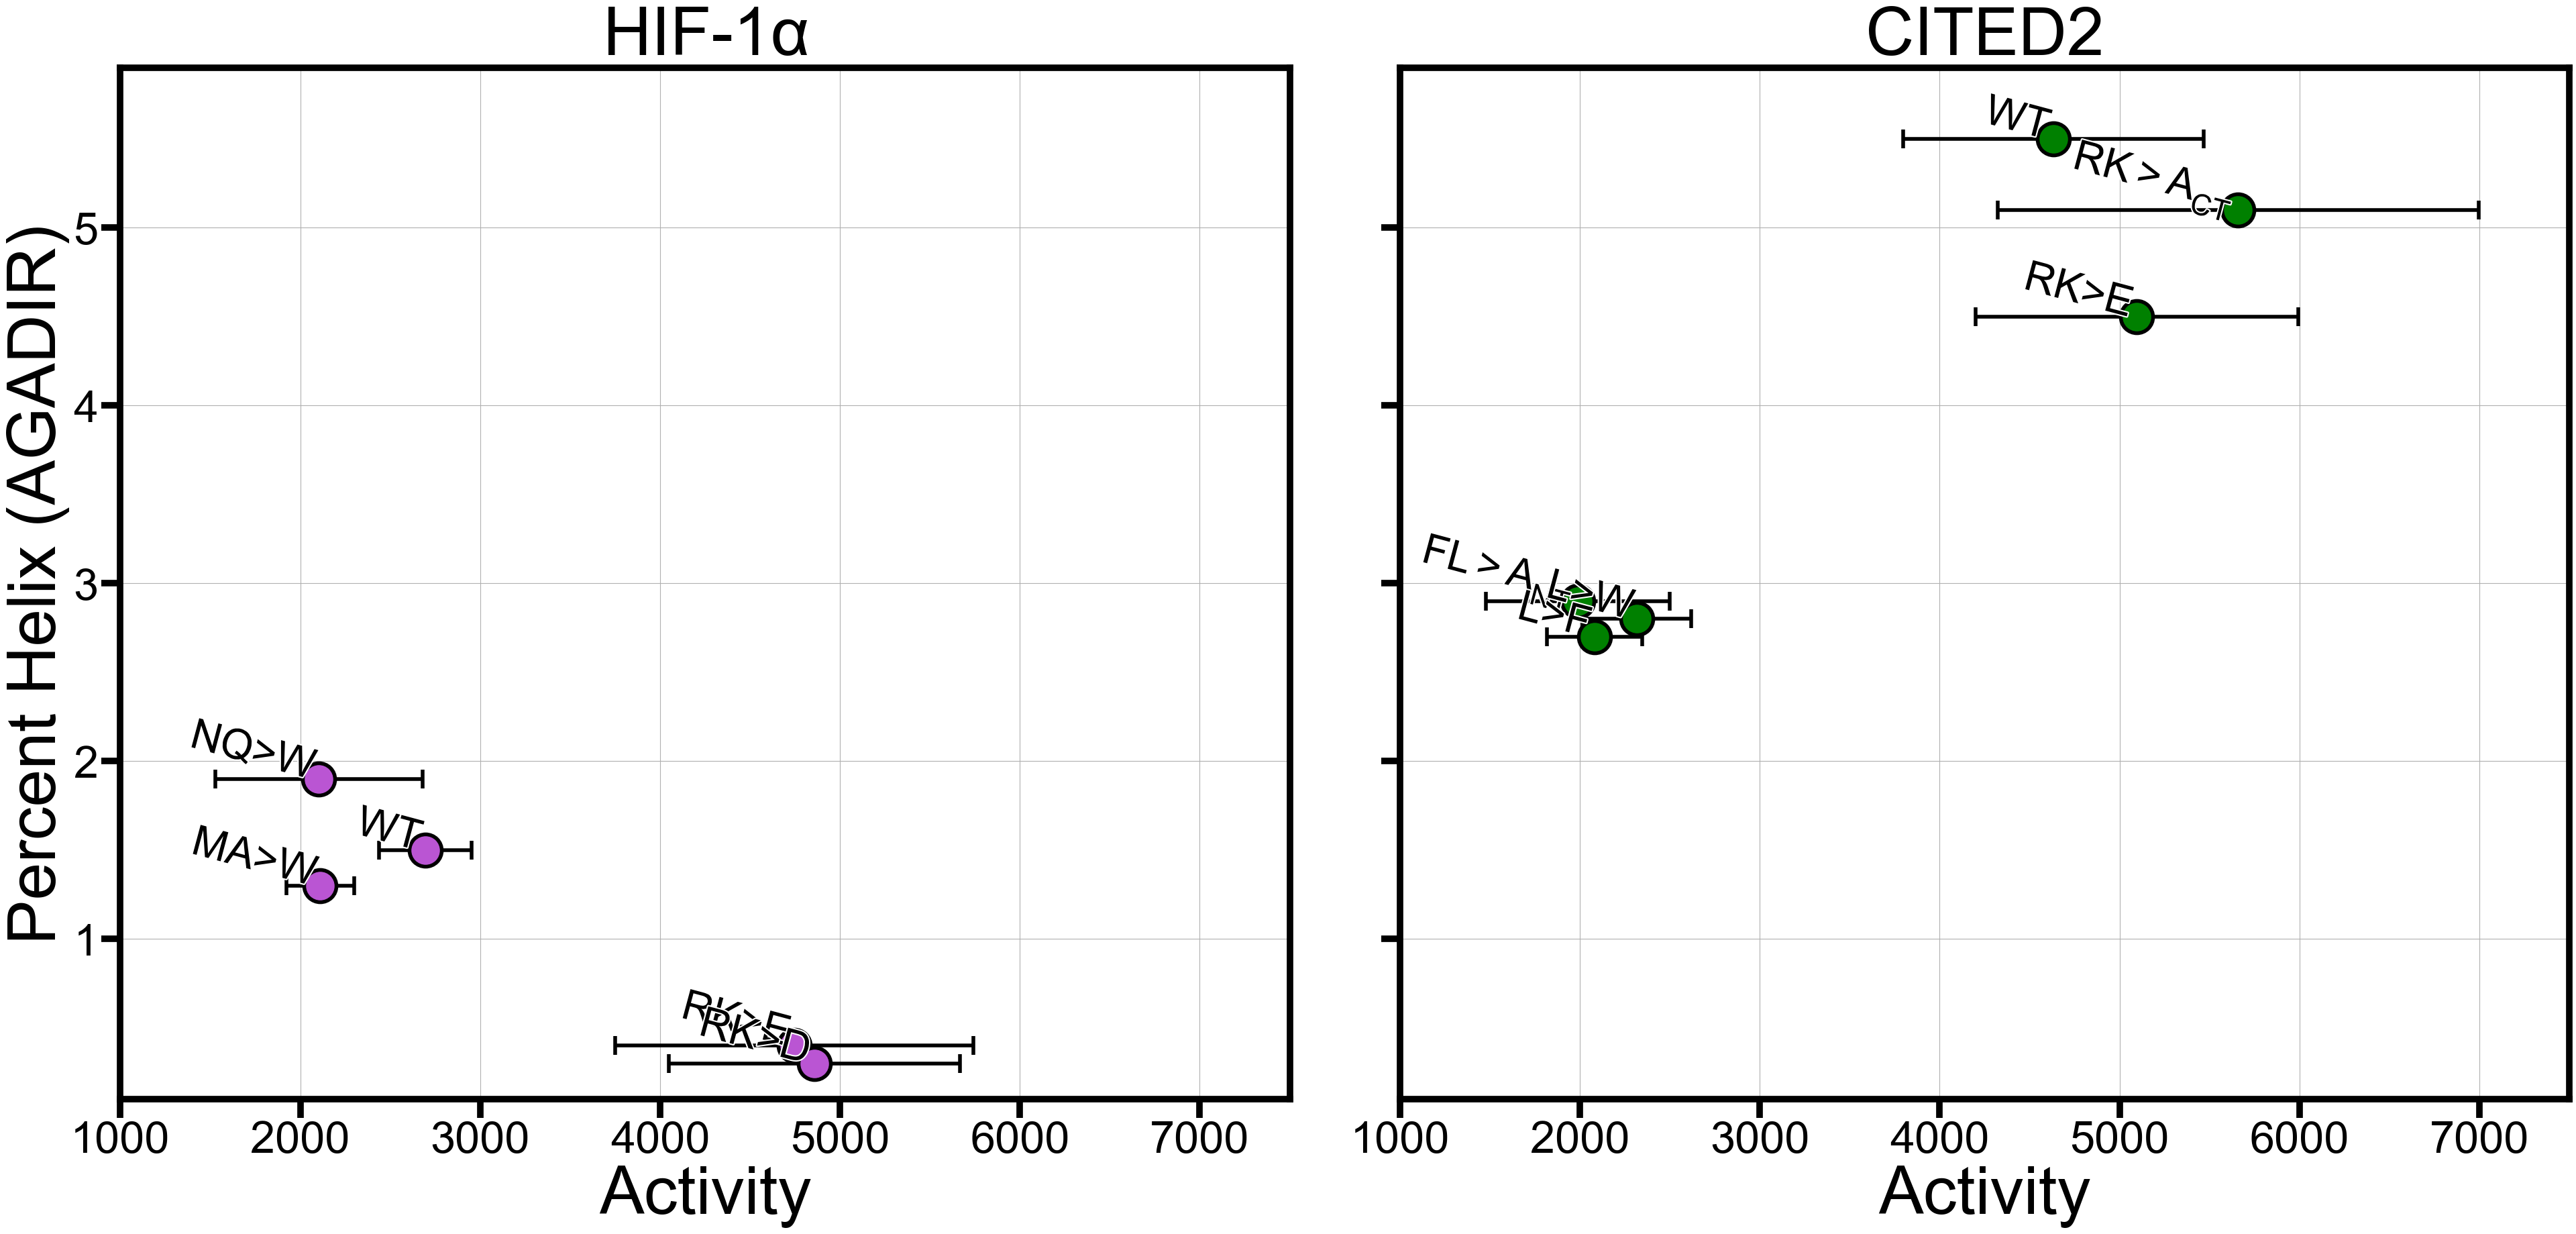

In [44]:
import matplotlib.patheffects as path_effects
# Example color mapping
color_mapping = {
    'HIF1A': 'mediumorchid',
    'CITED2': 'green',
}
# Filter the DataFrame for HIF1A and CITED2
hif1a_df = df[df['Protein'] == 'HIF1A']
cited2_df = df[df['Protein'] == 'CITED2']

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(40, 20), sharey=True)

# Scatter plot for HIF1A
# Scatter plot for CITED2
axes[0].errorbar(
    hif1a_df['Activity_Mean_MSS18'], 
    hif1a_df['Percent Helix'], 
    xerr=hif1a_df['Activity_std_MSS18'], 
    fmt='o', 
    ecolor='black',
    elinewidth=4, 
    label='HIF1A', 
    capsize=10,
    markersize=25,
    capthick=4,
)
axes[0].scatter(
    hif1a_df['Activity_Mean_MSS18'], 
    hif1a_df['Percent Helix'], 
    s=1200, 
    color=color_mapping.get('HIF1A'), 
    edgecolor='black', 
    linewidth=4, 
    alpha=1, 
    zorder=3,
)
for i, row in hif1a_df.iterrows():
    text = axes[0].text(
        row['Activity_Mean_MSS18'], 
        row['Percent Helix'], 
        row['MutName'], 
        fontsize=45, 
        ha='right',
        rotation=-15,
    )
    # Add halo effect
    text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='white'),  # White halo
        path_effects.Normal()
    ])
axes[0].set_title(r'HIF-1$\alpha$')
axes[0].set_xlabel('Activity')
axes[0].set_ylabel('Percent Helix (AGADIR)')
axes[0].grid(True)
axes[0].set_xlim(1000,7500)
# Scatter plot for CITED2
axes[1].errorbar(
    cited2_df['Activity_Mean_MSS18'], 
    cited2_df['Percent Helix'], 
    xerr=cited2_df['Activity_std_MSS18'], 
    fmt='o', 
    ecolor='black',
    elinewidth=4, 
    label='CITED2', 
    capsize=10,
    markersize=25,
    capthick=4,
)
axes[1].scatter(
    cited2_df['Activity_Mean_MSS18'], 
    cited2_df['Percent Helix'], 
    s=1200, 
    color=color_mapping.get('CITED2'), 
    edgecolor='black', 
    linewidth=4, 
    alpha=1, 
    zorder=3,
)

for i, row in cited2_df.iterrows():
    text = axes[1].text(
        row['Activity_Mean_MSS18'], 
        row['Percent Helix'], 
        row['MutName'], 
        fontsize=45, 
        ha='right',
        rotation=-15,
    )
    # Add halo effect
    text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='white'),  # White halo
        path_effects.Normal()
    ])
axes[1].set_title('CITED2')
axes[1].set_xlabel('Activity')
axes[1].set_xlim(1000,7500)
axes[1].set_ylim(0.1,5.9)

axes[1].grid(True)
# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [45]:
pwd

'/Users/eflores500/Documents/STALLER_MANUSCRIPT/GITHUB/AGADIR'